In [1]:
import os, sys
from scipy.integrate import solve_ivp

In [2]:
import numpy as np
from tqdm import tqdm

In [3]:
import matplotlib.pyplot as plt

In [4]:
cwd = os.getcwd()
cwd_ujoin = cwd.split("\\")[:-2]
basedir = "\\".join(cwd_ujoin)
sys.path.append(basedir)

In [5]:
from attitude.rigid_body import attitude_rate

Detumbling

In [6]:
def lyapunov(w, I):
    return 0.5*w.T@I@w

In [7]:
def lyapunov_rate(w, I):
    return w.T@T_ext

In [8]:
def xdot(x, u, I, **params):
    qdot, wdot = attitude_rate(x[:4], x[4:], u, I)
    return np.hstack((qdot, wdot))

In [9]:
def predict(x, u, I, start, end, **solver_opts):
    fx = lambda t, y: xdot(y, u, I)
    sol = solve_ivp(fx, [start, end], x, rtol = 1e-5, **solver_opts)
    return sol.y.flatten()

Regulation

In [10]:
q0 = np.array([1, 0, 0, 0])

In [11]:
w0 = np.deg2rad(np.array([2.0, 2.0, 2.0]))

In [12]:
x0 = np.hstack((q0, w0))
u0 = np.array([0.0, 0.0, 0.0])

In [13]:
t_start = 0
t_end = 100
dt = 0.5
t_vec = np.arange(t_start, t_end + dt, dt)

In [14]:
I = np.diag([10.0, 10.0, 100.0])

In [15]:
x = x0
u = u0
x_history = np.zeros((len(t_vec), len(x)))
u_history = np.zeros((len(t_vec), len(u)))
solver_opts = dict(t_eval=[0])
K = np.array([
    [0.5,  0,  0],
    [0, 0.5, 0],
    [0, 0,  10]
])
errp = 0
errn = errp
err_total = 0

for idx, t in enumerate(t_vec):
    x_history[idx, :] = x
    u_history[idx, :] = u
    start = t
    end = t + dt
    solver_opts['t_eval'] = [end]
    xnew = predict(x, u, I, start, end, **solver_opts)
    u = -K@xnew[4:]
    x = xnew

In [16]:
x_history = np.array(x_history)

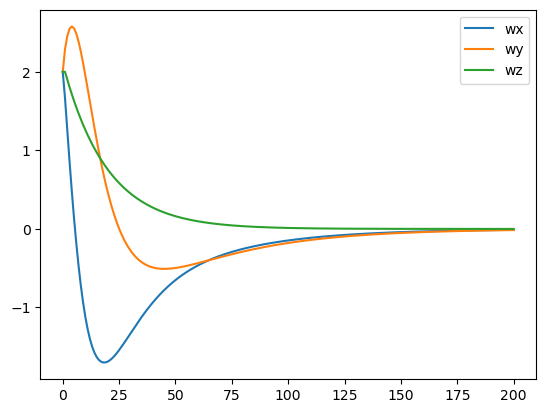

In [17]:
plt.plot(np.rad2deg(x_history[:, 4:]))
plt.legend(['wx', 'wy', 'wz'])

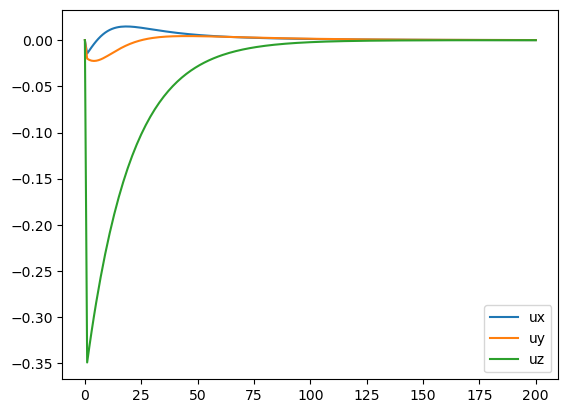

In [18]:
plt.plot(u_history)
plt.legend(['ux', 'uy', 'uz'])